In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits = pd.read_csv('tmdb_5000_credits.csv')

### Q1. Combien le cinema a rapporté par année

In [8]:
df[['release_date', 'revenue', 'budget']].head()

,release_date,revenue,budget
0,2009-12-10,2787965087,237000000
1,2007-05-19,961000000,300000000
2,2015-10-26,880674609,245000000
3,2012-07-16,1084939099,250000000
4,2012-03-07,284139100,260000000


In [12]:
# Nettoyer les valeurs nulles de release_date
# On garde les lignes de df où release_date est non null
df = df[df['release_date'].notnull()]

In [13]:
df['release_year'] = df['release_date'].apply(lambda x: x[:4])

In [15]:
df['release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: object

In [19]:
%matplotlib inline

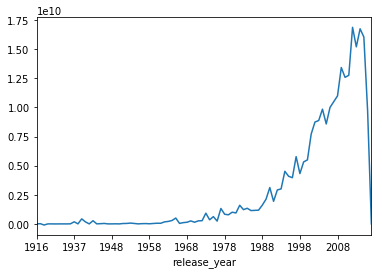

In [22]:
df['profit'] = df['revenue'] - df['budget']

df.groupby('release_year')['profit'].sum().plot(kind='line')

### Q2.  Quel est le film qui a rapporté le plus d'argent

In [24]:
df.sort_values('profit', ascending=False)['title'].head()

0             Avatar
25           Titanic
28    Jurassic World
44         Furious 7
16      The Avengers
Name: title, dtype: object

In [31]:
df.sort_values('profit', ascending=False).reset_index(drop=True)['title']

0                                              Avatar
1                                             Titanic
2                                      Jurassic World
3                                           Furious 7
4                                        The Avengers
5                             Avengers: Age of Ultron
6                                              Frozen
7                                             Minions
8       The Lord of the Rings: The Return of the King
9                                          Iron Man 3
10                     Transformers: Dark of the Moon
11                                            Skyfall
12                         Captain America: Civil War
13                                    Despicable Me 2
14                    Transformers: Age of Extinction
15                                        Toy Story 3
16         Pirates of the Caribbean: Dead Man's Chest
17                                      Jurassic Park
18           Harry Potter an

### Q3. Quels sont les 3 pays qui ont produit le plus de films

In [34]:
df['production_countries'].iloc[0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [36]:
c = '[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [38]:
import json

parsed_c = json.loads(c)

In [45]:
parsed_c

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [41]:
[item['iso_3166_1'] for item in parsed_c]

['US', 'GB']

In [42]:
def clean_production_countries(row):
    parsed_json = json.loads(row)
    return [item['iso_3166_1'] for item in parsed_json]

In [46]:
df['prod'] = df['production_countries'].apply(clean_production_countries)

In [52]:
output = {}

for country in df['prod'].sum():
    if country not in output:
        output[country] = 0
    output[country] += 1
 
print(output)

{'US': 3956, 'GB': 636, 'JM': 2, 'BS': 4, 'DM': 1, 'CZ': 24, 'PL': 6, 'SI': 2, 'NZ': 28, 'DE': 324, 'CN': 59, 'CA': 261, 'IT': 72, 'JP': 58, 'MT': 4, 'AU': 110, 'FR': 306, 'BE': 25, 'IN': 54, 'NL': 18, 'ES': 71, 'AE': 14, 'HK': 48, 'TW': 5, 'IE': 37, 'MA': 4, 'HU': 13, 'SG': 2, 'NO': 14, 'SE': 19, 'ZA': 20, 'RU': 19, 'RO': 12, 'MX': 30, 'MC': 1, 'CH': 19, 'PK': 3, 'MY': 2, 'FI': 5, 'IS': 6, 'DK': 20, 'TN': 1, 'PH': 1, 'BG': 4, 'KR': 18, 'BR': 13, 'PE': 2, 'LU': 11, 'BA': 1, 'KZ': 2, 'PT': 1, 'AW': 1, 'LY': 1, 'RS': 1, 'UA': 1, 'CL': 2, 'AR': 9, 'PA': 1, 'AT': 6, 'GR': 3, 'LT': 1, 'KH': 1, 'TH': 6, 'SK': 2, 'IL': 6, 'FJ': 1, 'CS': 1, 'TR': 1, 'NG': 1, 'CY': 1, 'JO': 1, 'BO': 1, 'EC': 1, 'CO': 2, 'EG': 1, 'BT': 1, 'LB': 1, 'KG': 1, 'DZ': 1, 'ID': 1, 'GY': 1, 'IR': 4, 'GP': 1, 'AF': 1, 'AO': 1, 'DO': 1, 'CM': 1, 'KE': 1}


In [56]:
sorted(output.items(), key=lambda x: -x[1])

[('US', 3956),
 ('GB', 636),
 ('DE', 324),
 ('FR', 306),
 ('CA', 261),
 ('AU', 110),
 ('IT', 72),
 ('ES', 71),
 ('CN', 59),
 ('JP', 58),
 ('IN', 54),
 ('HK', 48),
 ('IE', 37),
 ('MX', 30),
 ('NZ', 28),
 ('BE', 25),
 ('CZ', 24),
 ('ZA', 20),
 ('DK', 20),
 ('SE', 19),
 ('RU', 19),
 ('CH', 19),
 ('NL', 18),
 ('KR', 18),
 ('AE', 14),
 ('NO', 14),
 ('HU', 13),
 ('BR', 13),
 ('RO', 12),
 ('LU', 11),
 ('AR', 9),
 ('PL', 6),
 ('IS', 6),
 ('AT', 6),
 ('TH', 6),
 ('IL', 6),
 ('TW', 5),
 ('FI', 5),
 ('BS', 4),
 ('MT', 4),
 ('MA', 4),
 ('BG', 4),
 ('IR', 4),
 ('PK', 3),
 ('GR', 3),
 ('JM', 2),
 ('SI', 2),
 ('SG', 2),
 ('MY', 2),
 ('PE', 2),
 ('KZ', 2),
 ('CL', 2),
 ('SK', 2),
 ('CO', 2),
 ('DM', 1),
 ('MC', 1),
 ('TN', 1),
 ('PH', 1),
 ('BA', 1),
 ('PT', 1),
 ('AW', 1),
 ('LY', 1),
 ('RS', 1),
 ('UA', 1),
 ('PA', 1),
 ('LT', 1),
 ('KH', 1),
 ('FJ', 1),
 ('CS', 1),
 ('TR', 1),
 ('NG', 1),
 ('CY', 1),
 ('JO', 1),
 ('BO', 1),
 ('EC', 1),
 ('EG', 1),
 ('BT', 1),
 ('LB', 1),
 ('KG', 1),
 ('DZ', 1),
 ('

In [69]:
# pd.DataFrame.from_dict(output).sort_values(1, ascending=False)

In [70]:
from collections import Counter
Counter(df['prod'].sum()).most_common(3)

[('US', 3956), ('GB', 636), ('DE', 324)]

### Q4. Quel est le genre le plus présent au cinéma

In [71]:
df['genres'].loc[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [72]:
def clean_production_genres(row):
    parsed_json = json.loads(row)
    return [item['name'] for item in parsed_json]

In [73]:
df['film_genres'] = df['genres'].apply(clean_production_genres)

In [74]:
Counter(df['film_genres'].sum()).most_common(3)

[('Drama', 2297), ('Comedy', 1722), ('Thriller', 1274)]

### Q5. Donner la note moyenne par genre

In [75]:
df[['film_genres', 'vote_average']].head()

,film_genres,vote_average
0,"[Action, Adventure, Fantasy, Science Fiction]",7.2
1,"[Adventure, Fantasy, Action]",6.9
2,"[Action, Adventure, Crime]",6.3
3,"[Action, Crime, Drama, Thriller]",7.6
4,"[Action, Adventure, Science Fiction]",6.1


In [83]:
t = df['film_genres'].apply(pd.Series).reset_index().melt(id_vars='index')x

,index,variable,value
0,0,0,Action
4802,0,1,Adventure
9604,0,2,Fantasy
14406,0,3,Science Fiction
19208,0,4,NaN
24010,0,5,NaN
28812,0,6,NaN


In [89]:
df['film_genres'].apply(pd.Series).reset_index().head()

,index,0,1,2,3,4,5,6
0,0,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN
1,1,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN
2,2,Action,Adventure,Crime,NaN,NaN,NaN,NaN
3,3,Action,Crime,Drama,Thriller,NaN,NaN,NaN
4,4,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN


In [93]:
all_genres = df['film_genres']\
    .apply(pd.Series).reset_index().melt(id_vars='index')

In [97]:
all_genres.head()

,index,variable,value
0,0,0,Action
1,1,0,Adventure
2,2,0,Action
3,3,0,Action
4,4,0,Action


In [102]:
votes = all_genres.merge(df['vote_average'].\
    reset_index(), on='index').dropna()

In [115]:
votes.head()

,index,variable,value,vote_average
0,0,0,Action,7.2
1,0,1,Adventure,7.2
2,0,2,Fantasy,7.2
3,0,3,Science Fiction,7.2
7,1,0,Adventure,6.9


In [114]:
votes.groupby('value')[['vote_average']].mean().\
    sort_values('vote_average', ascending=False)

,vote_average
value,
History,6.719797
War,6.713889
Drama,6.388594
Music,6.355676
Foreign,6.352941
Animation,6.341453
Crime,6.274138
Documentary,6.238182
Romance,6.207718


### Q6. Dans combien de film a joué Brad Pitt

In [120]:
credits[credits['cast'].str.contains('Brad Pitt')]

,movie_id,title,cast,crew
45,72190,World War Z,"[{""cast_id"": 4, ""character"": ""Gerry Lane"", ""cr...","[{""credit_id"": ""52fe485dc3a368484e0f50f9"", ""de..."
100,4922,The Curious Case of Benjamin Button,"[{""cast_id"": 4, ""character"": ""Daisy"", ""credit_...","[{""credit_id"": ""52fe43e2c3a36847f8076327"", ""de..."
145,652,Troy,"[{""cast_id"": 43, ""character"": ""Achilles"", ""cre...","[{""credit_id"": ""52fe4264c3a36847f801b043"", ""de..."
173,65759,Happy Feet Two,"[{""cast_id"": 1, ""character"": ""Mumble (voice)"",...","[{""credit_id"": ""52fe4718c3a368484e0b4d57"", ""de..."
196,38055,Megamind,"[{""cast_id"": 5, ""character"": ""Megamind (voice)...","[{""credit_id"": ""54d6824ec3a3683b95002995"", ""de..."
247,163,Ocean's Twelve,"[{""cast_id"": 11, ""character"": ""Danny Ocean"", ""...","[{""credit_id"": ""52fe4221c3a36847f80062d7"", ""de..."
248,787,Mr. & Mrs. Smith,"[{""cast_id"": 19, ""character"": ""Jane Smith"", ""c...","[{""credit_id"": ""52fe4276c3a36847f8020875"", ""de..."
372,1535,Spy Game,"[{""cast_id"": 2, ""character"": ""Nathan D. Muir"",...","[{""credit_id"": ""559fd2d8c3a3680810005604"", ""de..."
377,4477,The Devil's Own,"[{""cast_id"": 3, ""character"": ""Tom O'Meara"", ""c...","[{""credit_id"": ""52fe43c5c3a36847f806e313"", ""de..."
388,161,Ocean's Eleven,"[{""cast_id"": 11, ""character"": ""Danny Ocean"", ""...","[{""credit_id"": ""52fe4220c3a36847f800615d"", ""de..."


In [130]:
len(credits[credits['cast'].str.contains('Brad Pitt')])

38

### Q7. Quel était le premier film de Angelina Jolie

In [125]:
angelina = credits[credits['cast'].str.contains('Angelina Jolie')]

In [131]:
angelina.merge(df, left_on='movie_id', right_on='id').\
    sort_values('release_date')

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,spoken_languages,status,tagline,title_y,vote_average,vote_count,release_year,profit,prod,film_genres
19,10428,Hackers,"[{""cast_id"": 16, ""character"": ""Dade Murphy / '...","[{""credit_id"": ""52fe436e9251416c750100bb"", ""de...",20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,10428,"[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"There is no right or wrong, only fun and boring",Hackers,6.2,398,1995,-12436272,[US],"[Action, Crime, Thriller, Drama]"
20,12596,Pushing Tin,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",33000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy about losing control,Pushing Tin,5.7,116,1999,-33000000,"[DE, US]","[Comedy, Drama]"
17,9481,The Bone Collector,"[{""cast_id"": 1, ""character"": ""Lincoln Rhyme"", ...","[{""credit_id"": ""52fe44fdc3a36847f80b61e7"", ""de...",73000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,9481,"[{""id"": 856, ""name"": ""paraplegic""}, {""id"": 534...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Serial killer vs. forensic genius,The Bone Collector,6.5,826,1999,78493655,[US],"[Drama, Mystery, Thriller, Crime]"
22,3558,"Girl, Interrupted","[{""cast_id"": 14, ""character"": ""Susanna Kaysen""...","[{""credit_id"": ""52fe439cc3a36847f806189f"", ""de...",40000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3558,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The crazy thing is, you're not crazy.","Girl, Interrupted",7.6,721,1999,-40000000,"[DE, US]",[Drama]
8,9679,Gone in Sixty Seconds,"[{""cast_id"": 1, ""character"": ""Randall 'Memphis...","[{""credit_id"": ""52fe451ac3a36847f80bc99f"", ""de...",90000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9679,"[{""id"": 380, ""name"": ""brother brother relation...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Ice Cold, Hot Wired.",Gone in Sixty Seconds,6.1,1485,2000,147202299,[US],"[Action, Crime, Thriller]"
10,1995,Lara Croft: Tomb Raider,"[{""cast_id"": 12, ""character"": ""Lara Croft"", ""c...","[{""credit_id"": ""568685039251412e5201dbcf"", ""de...",115000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,1995,"[{""id"": 1454, ""name"": ""treasure""}, {""id"": 1529...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Born into Wealth. Groomed by the Elite. Traine...,Lara Croft: Tomb Raider,5.7,2192,2001,159703340,[US],"[Adventure, Fantasy, Action, Thriller]"
21,2057,Original Sin,"[{""cast_id"": 17, ""character"": ""Julia Russell/B...","[{""credit_id"": ""52fe4330c3a36847f80412ff"", ""de...",42000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2057,"[{""id"": 515, ""name"": ""women""}, {""id"": 572, ""na...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,This is not a love story - it's a story about ...,Original Sin,5.8,198,2001,-6597680,"[FR, US]","[Drama, Thriller, Mystery, Romance]"
18,16643,Life or Something Like It,"[{""cast_id"": 1, ""character"": ""Lanie Kerrigan"",...","[{""credit_id"": ""54a456919251414d2700d04c"", ""de...",40000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,16643,[],en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Life or Something Like It,5.7,124,2002,-23127329,"[CA, US]","[Comedy, Drama, Romance]"
11,1996,Lara Croft Tomb Raider: The Cradle of Life,"[{""cast_id"": 11, ""character"": ""Lara Croft"", ""c...","[{""credit_id"": ""52fe432ac3a36847f803f41d"", ""de...",95000000,"[{""id"": 28, 